In [604]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [605]:
HP = pd.read_csv('Holiday_Package.csv')

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [606]:
# Dimensions of the data:

print('Total number of observations: ', HP.shape[0])
print("")
print('Total number of Features: ', HP.shape[1])

Total number of observations:  872

Total number of Features:  8


In [607]:
# Checking for any duplicates:

HP.duplicated().sum()

0

In [608]:
# Null values and Data type check:

HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [1162]:
# Overview of first 10 observations:

HP.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [1163]:
# Overview of last 10 observations:

HP.tail(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [611]:
HP = HP.drop(['Unnamed: 0'],axis=1)

In [612]:
# Data description: Numerical features only:

HP.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


Education, Number of young and older children features are categorical type.

In [613]:
# Data description: Categorical features only:

HP.describe(include='object').T

,count,unique,top,freq
Holliday_Package,872,2,no,471
foreign,872,2,no,656


 Target variable classes:


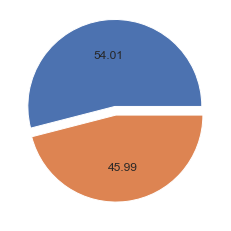

In [1164]:
print('\033[1m','Target variable classes:')
plt.pie(HP['Holliday_Package'].value_counts(normalize=True)*100,autopct='%.2f',explode=(0.1,0));

#### Data description:
1. Data has 872 rows and 7 columns (excl. Unnamed)
2. No null values in the data.
3. No duplicates with unique ID.
4. Salary: 75% of the employees earn around 53500. Only 25% of the employees are earning more than them. Only 6 employees earn more than 150000.
5. The Minimum salary in the summary can be a wrong entry. The person has aged more than 50 and has 12 years of Education but the salary mentioned is irrelavent.

In [627]:
# Making a copy of a original dataframe:
df = HP.copy()

In [628]:
df.rename(columns={'age' :'Age', 'educ': 'No_years_Education',
                   'no_young_children' :'No_Young_kids','no_older_children' :'No_Elder_kids',
                   'Holliday_Package':'Holiday_package','foreign' : 'Foreigner'},inplace=True)

#### The categorical groups/classes with very less data are grouped with the nearest class. 
1. This is executed in order to reduce the number of groups within Education and Elder kids feature.

In [897]:
# Checking the Categorical variables. 

# Too many classes, hence the classes with less frequencies are combined

pd.crosstab(HP['Holliday_Package'],HP['educ'])

educ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21
Holliday_Package,,,,,,,,,,,,,,,,,,,,
no,0,3,2,21,27,10,15,90,59,55,62,79,18,14,7,4,2,0,2,1
yes,1,3,9,29,40,11,16,67,55,35,38,45,25,11,8,6,1,1,0,0


In [630]:
df['No_years_Education'] = np.where(df['No_years_Education'] <=4,4,df['No_years_Education'])
df['No_years_Education'] = np.where(df['No_years_Education'] >=17,17,df['No_years_Education'])

In [899]:
# 5 and 6 can be combined

pd.crosstab(HP['Holliday_Package'],HP['no_older_children'])

no_older_children,0,1,2,3,4,5,6
Holliday_Package,,,,,,,
no,231,102,102,27,7,2,0
yes,162,96,106,28,7,0,2


In [631]:
df['No_Elder_kids'] = np.where(df['No_Elder_kids'] >=5,5,df['No_Elder_kids'])

In [632]:
# Label encoding 

# Class of interest 'Yes' as 1

df['Holiday_package'] = np.where(df['Holiday_package'] == 'yes',1,df['Holiday_package'])
df['Holiday_package'] = np.where(df['Holiday_package'] == 'no',0,df['Holiday_package'])

In [633]:
# Label encoding 

df['Foreigner'] = np.where(df['Foreigner'] == 'yes',1,df['Foreigner'])
df['Foreigner'] = np.where(df['Foreigner'] == 'no',0,df['Foreigner'])

In [634]:
# Changing the data type

df['Holiday_package'] = df['Holiday_package'].astype('int64')
df['Foreigner'] = df['Foreigner'].astype('int64')

#### Outlier and Anamoly treatment for Salary:

In [892]:
# Percentage of observations' salary above the Upper range:

HP[HP['Salary'] > ur].count()[0] / HP.shape[0]*100

6.422018348623854


1. The percentage of number of observations more than upper range is 6.42%. Salary will be different for each and every employee.
2. So outliers not treated


In [958]:
# anamoly in salary is treated

df['Salary'] = np.where(df['Salary'] < lr,df['Salary'].quantile(0.05),df['Salary'])

<AxesSubplot:xlabel='Salary'>

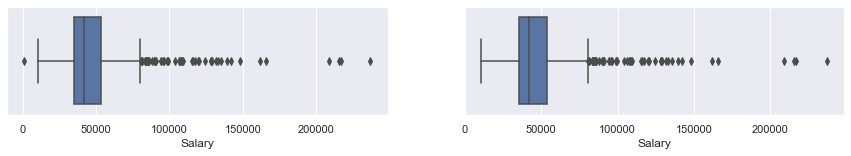

In [1009]:
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
sns.boxplot(x=HP['Salary'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'])

#### EDA and Data Visualization:

##### Skewness, Kurtosis, Coefficient of Variance% and Variance Inflation Factor:

In [1153]:
# creating a separate dataframe for EDA
df_EDA = df.copy()

In [1154]:
Numerical = df_EDA[['Salary','Age']]

Discrete = df_EDA[['Holiday_package','No_years_Education','No_Young_kids','No_Elder_kids','Foreigner']]

In [1155]:
for i in Numerical:
    print('The Coefficient of Variance for the column',i, 'is ',
          round((Numerical[i].std()/Numerical[i].mean())*100),'%')

The Coefficient of Variance for the column Salary is  49 %
The Coefficient of Variance for the column Age is  26 %


In [1013]:
for i in Numerical:
    if Numerical[i].skew() <= .51:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is approx symmetrical')
    elif Numerical[i].skew() > 1.1:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is extremely skewed')
    else:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is slightly skewed')

Skewness for Salary 3.1235 it is extremely skewed
Skewness for Age 0.1464 it is approx symmetrical


In [1014]:
for i in Numerical:
    if Numerical[i].kurtosis() < 3:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),
              'Platykurtic - kurtosis less than normal distribution')
    elif Numerical[i].skew() == 3:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),'it is a Mesokurtic kurtosis')
    else:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),
              'Leptokurtic - kurtosis more than normal distribution')

Kurtosis for Salary : 15.9501 Leptokurtic - kurtosis more than normal distribution
Kurtosis for Age : -0.91 Platykurtic - kurtosis less than normal distribution


In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Logistic Regression assumption on Multi collinearity: 

In [1156]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['No_years_Education','No_Young_kids','No_Elder_kids','Foreigner','Salary','Age']].values, i) 
                      for i in range(df[['No_years_Education','No_Young_kids','No_Elder_kids','Foreigner','Salary','Age']].shape[1])]
vif["features"] = df[['No_years_Education','No_Young_kids','No_Elder_kids','Foreigner','Salary','Age']].columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,9.830872,No_years_Education
5,8.067121,Age
4,6.098640,Salary
2,1.893281,No_Elder_kids
1,1.543474,No_Young_kids
3,1.426691,Foreigner


* There is multi collinearity in the data between No of years of Education and Salary. But the level is not very high.

#### LDA Assumptions check:
1. Equal variance among independent variables for the classes
2. Normality in independent variables for the classes

In [1016]:
# Class YES

df[df['Holiday_package'] ==1].var()

Holiday_package       0.000000e+00
Salary                2.392039e+08
Age                   8.193002e+01
No_years_Education    9.742344e+00
No_Young_kids         2.535910e-01
No_Elder_kids         1.182257e+00
Foreigner             2.327805e-01
dtype: float64

In [1017]:
# Class NO

df[df['Holiday_package'] ==0].var()

Holiday_package       0.000000e+00
Salary                7.747447e+08
Age                   1.348445e+02
No_years_Education    7.607544e+00
No_Young_kids         4.593938e-01
No_Elder_kids         1.130867e+00
Foreigner             1.253015e-01
dtype: float64

In [1018]:
from scipy.stats import shapiro
# Class No

shapiro(df[df['Holiday_package'] ==0]['Age'])

ShapiroResult(statistic=0.9558587670326233, pvalue=1.1568306035325548e-10)

In [1019]:
# Class Yes
shapiro(df[df['Holiday_package'] ==1]['Age'])

ShapiroResult(statistic=0.9893777370452881, pvalue=0.005250321235507727)

In [1020]:
# Class No
shapiro(df[df['Holiday_package'] ==0]['Salary'])

ShapiroResult(statistic=0.7494243383407593, pvalue=4.245327376412784e-26)

In [1023]:
# Class Yes
shapiro(df[df['Holiday_package'] ==1]['Salary'])

ShapiroResult(statistic=0.8652468919754028, pvalue=3.829774271407226e-18)

* All the pvalues are less than 0.05. The age and Salary follows a normal distribution for classes

#### Univariate Analysis: Numerical Columns

In [1024]:
def Univariate_analysis_num(column,bins):
    
    plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Histogram and Boxplot for the " +column,"column",'\033[0m')
    
    sns.histplot(Numerical[column],kde=True,color='k',bins=20,palette='magma')
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[column],saturation=2,whis=2,linewidth=2,palette='magma')
    plt.show()

 
 Histogram and Boxplot for the Salary column 


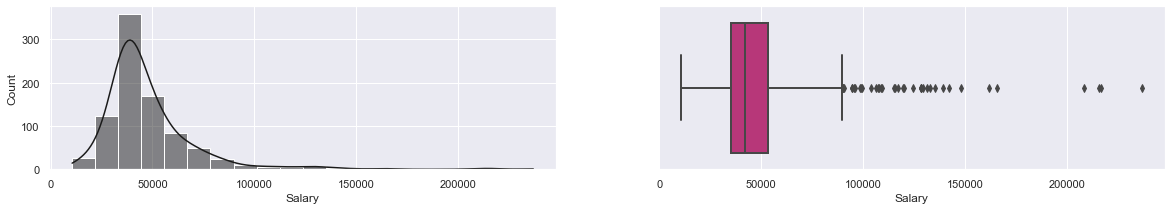

 
 Histogram and Boxplot for the Age column 


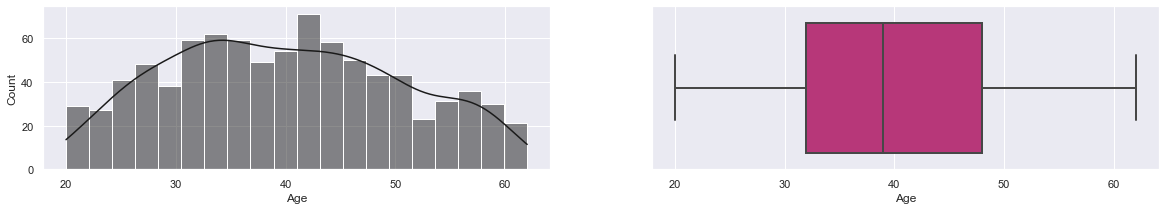

In [1025]:
for i in Numerical:
    Univariate_analysis_num(i,20)

#### Univariate Analysis: Discrete Columns

In [1171]:
def Univariate_analysis_Dis(column):

    plt.figure(figsize=(5,7))
    sns.countplot(x=Discrete[column])
    

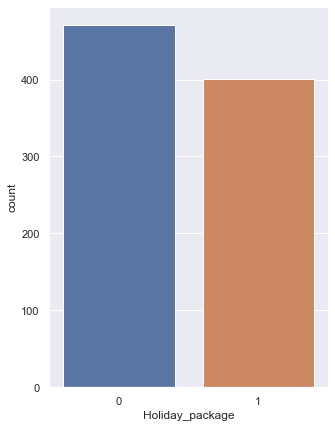

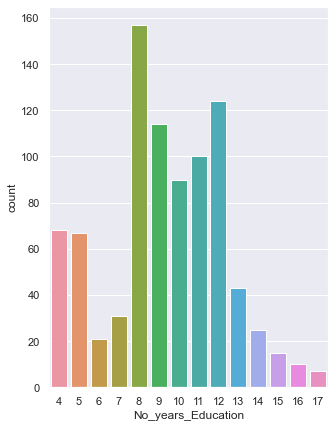

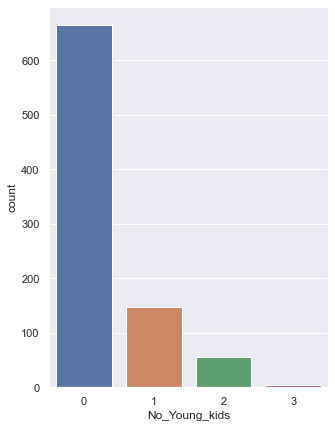

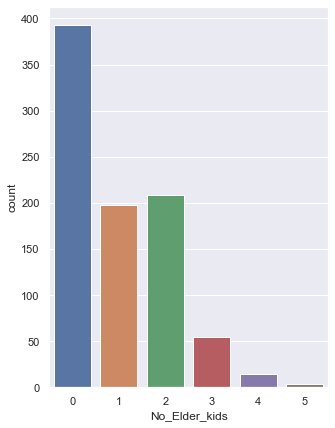

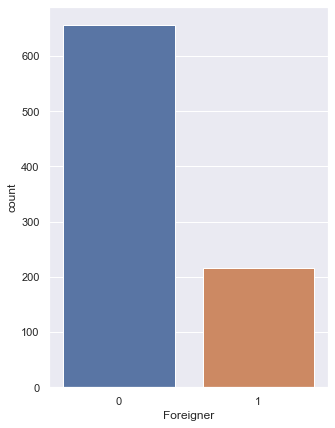

In [1172]:
for i in Discrete:
    Univariate_analysis_Dis(i)

#### Univariate Analysis Summary:
1. The highest peak in the histogram of Salary cleary shows that most of the samples are clustered around 47000 to 50000 salary range. Extremely Right skewed distribution. The boxplot shows no outlier in the lower boundary - Anamoly treated. 
2. The kurtosis and skew is very low for Age, denoting that there are no outliers and the samples are almost evenly distributed.
3. The preference for Holiday package which is out target variable has 54:45 ratio. i.e., No = 54% and Yes = 45%. 
4. The target variable is very close to equal percentage. Hence the accuracy of the model will be around 60%.
5. More employees falls under 8 years of education and the next highest groups are 5,9 and 12 years of education.
6. Almost 31% of employees do not have Children.
7. Most of the Employees have 1 to 2 elder kids.
8. Only 24% of the Employees are foreigners.

#### Bi-variate Analysis: 

  Bivariate Analysis: Pairplot for the Numerical features 


<Figure size 1440x720 with 0 Axes>

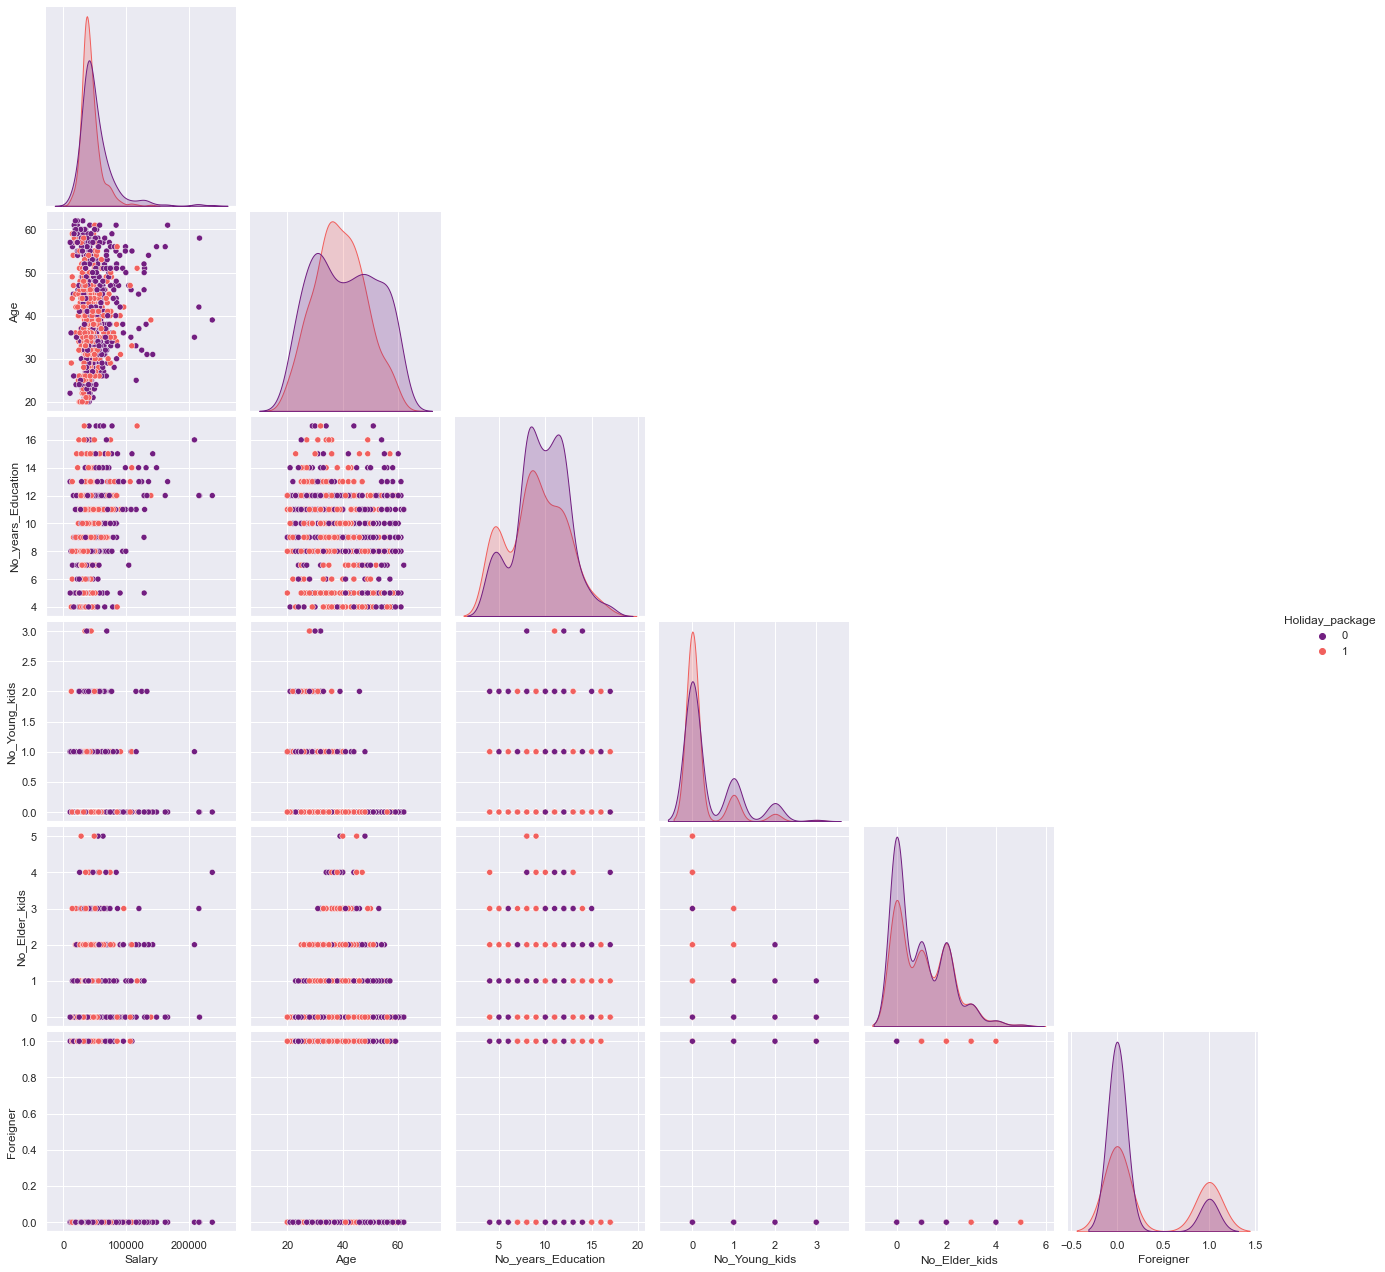

In [1165]:
# Pair plot
print('\033[1m'," Bivariate Analysis: Pairplot for the Numerical features",'\033[0m')
plt.figure(figsize=(20,10))
sns.pairplot(data = df,hue='Holiday_package',height=3,palette='magma',corner=True,diag_kind='kde');

  Bivariate Analysis: Correlation plot on all Independent variables 


<AxesSubplot:>

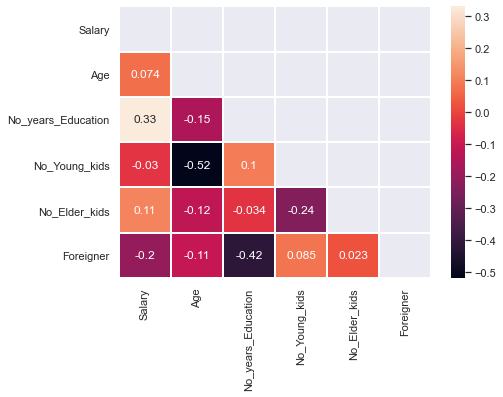

In [1166]:
# # Correlation plot 1:
print('\033[1m'," Bivariate Analysis: Correlation plot on all Independent variables",'\033[0m')
plt.figure(figsize=(7,5))
mask = np.triu(np.ones_like(df[['Salary','Age','No_years_Education','No_Young_kids','No_Elder_kids','Foreigner']].corr(),dtype=np.bool))
sns.heatmap(df[['Salary','Age','No_years_Education','No_Young_kids','No_Elder_kids','Foreigner']].corr(),annot=True,mask=mask,linewidths=1,linecolor='w')

  Bivariate Analysis: Correlation plot B/w Independent and dependent variables 


<AxesSubplot:>

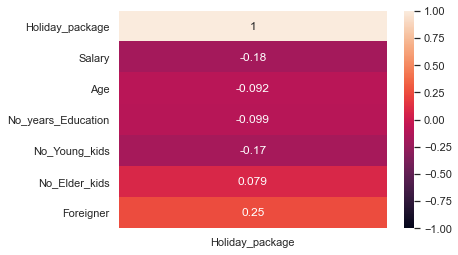

In [1167]:
# Correlation plot 2:
print('\033[1m'," Bivariate Analysis: Correlation plot B/w Independent and dependent variables",'\033[0m')
sns.heatmap(df.corr()[['Holiday_package']],annot=True,vmin=-1,vmax=1)

##### Salary Vs. Number of years of Education | Hue: Target variable:

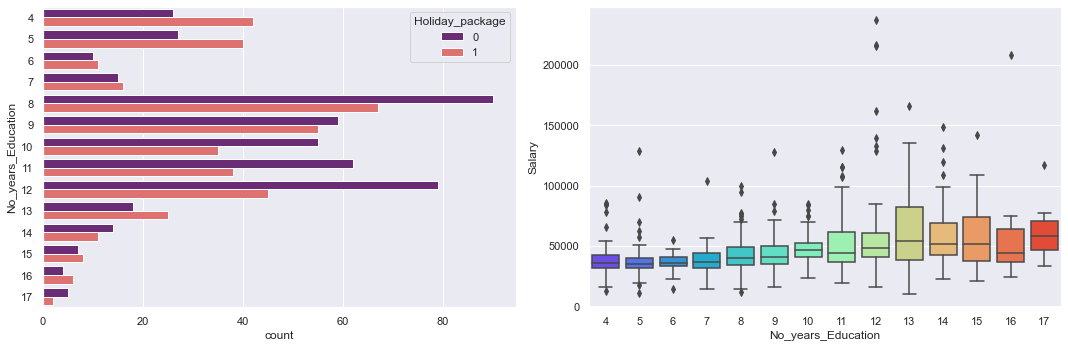

In [1029]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=Discrete['No_years_Education'],hue=Discrete['Holiday_package'],palette='magma')
plt.subplot(1,2,2)
sns.boxplot(x=Discrete['No_years_Education'],y=Numerical['Salary'],palette='rainbow')
plt.tight_layout()

##### Number of young kids and Number of Elder kids Vs. Age of employees | Hue: Target variable:

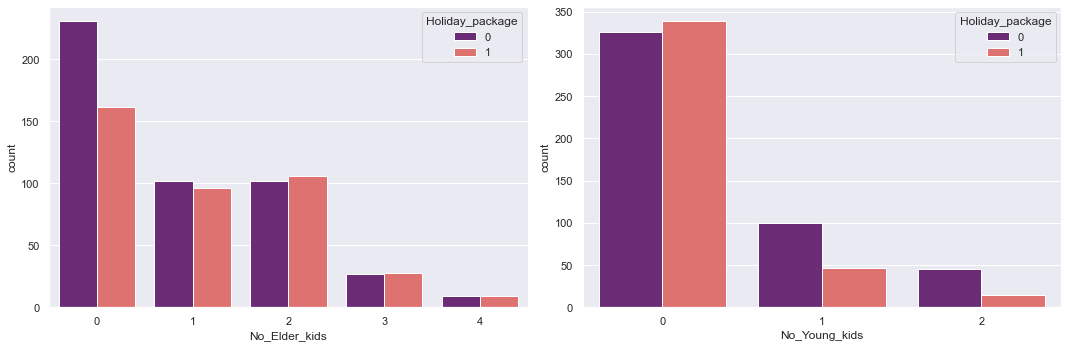

In [221]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Discrete['No_Elder_kids'],hue=Discrete['Holiday_package'],palette='magma')
plt.subplot(1,2,2)
sns.countplot(x=Discrete['No_Young_kids'],hue=Discrete['Holiday_package'],palette='magma')
plt.tight_layout()

##### Foreigner vs. Age and Number of years of Education | Hue: Target variable:

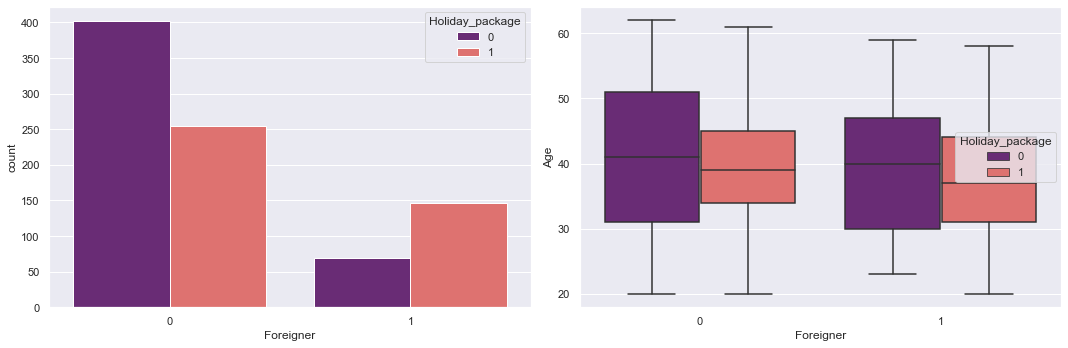

In [222]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Discrete['Foreigner'],hue=Discrete['Holiday_package'],palette='magma')
plt.subplot(1,2,2)
sns.boxplot(x=Discrete['Foreigner'],y=Numerical['Age'],hue=Discrete['Holiday_package'],palette='magma')
plt.tight_layout()

##### Salary and Age vs. Target Variable:

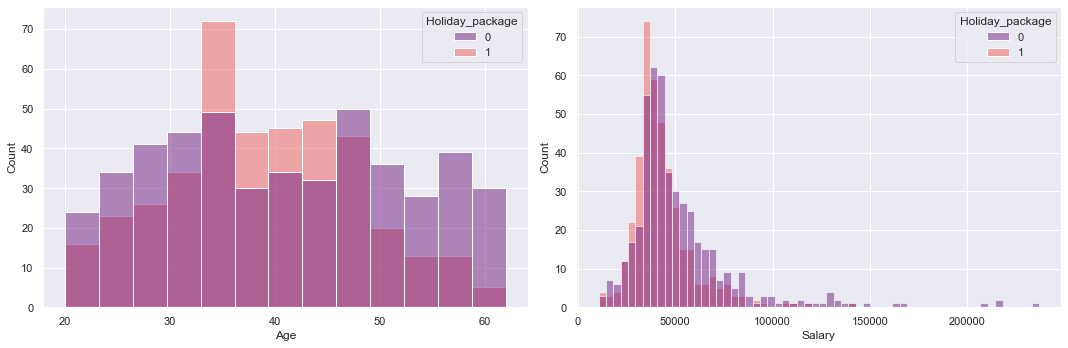

In [1030]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=Numerical['Age'],hue=Discrete['Holiday_package'],palette='magma')
plt.subplot(1,2,2)
sns.histplot(x=Numerical['Salary'],hue=Discrete['Holiday_package'],palette='magma')
plt.tight_layout()


#### Bivariate analysis summary:

1. The Salary of employees is not strongly correlated with the number of years of education. As the number of yeas of education increases the outliers in the Salary also increases. This clearly shows that there are mixed level of employees in the data.
2. Employees with upto *5 years* of education shows more interest for holiday package than other groups. Almost half of the employees from the group *9,13,15 and 16 years of education* choose the hoilday package.
3. No significant relationship between the target and employees with elder kids. But a very weak negative relationship with No of yound kids is noticed. *Employees with 0 young kids prefer holiday package.*
4. The only positively correlated variable is Foreigner. *Almost 68% of the employees who are foreigners prefers the holiday tour package* and their mean age is 37 years.
5. *The Median age for 'Yes' category is less than the other group.*
6. *The Median salary for the employees who prefer package is 39809* and the other category has a median salary of 43940.
7. Most of the outliers i.e., *employees earning more than 100000 do not prefer for a Holiday package.*
8. *#Correlation plot 2: r between −0.4 and +0.4 indicates absence of linear dependence.* There is no strong linear dependency between independent and dependent variables.
9. *The Age and Salary variables do not help in discriminating the target classes.*

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [1031]:
df_model = df.copy()

In [1032]:
# Copy all the predictor variables into X dataframe
X = df.iloc[:,1:]
# Copy target into the y dataframe. 
y = df['Holiday_package']

In [1136]:
# Split X and y into training and test set in 70:30 ratio
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30 , random_state=123)

In [977]:
print('Number of rows and columns of the training set for the independent variables:',Xtrain.shape)
print('Number of rows and columns of the training set for the dependent variable:',ytrain.shape)
print('Number of rows and columns of the test set for the independent variables:',Xtest.shape)
print('Number of rows and columns of the test set for the dependent variable:',ytest.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [1137]:
# Target class check after split:
ytrain.value_counts(normalize=True)

0    0.542623
1    0.457377
Name: Holiday_package, dtype: float64

In [1138]:
# Target class check after split:
ytest.value_counts(normalize=True)

0    0.534351
1    0.465649
Name: Holiday_package, dtype: float64

#### Logistic Regression model:

In [978]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1139]:
Params = {'penalty':['l2','none'],
      'solver':['newton-cg','liblinear'],
         'tol':[0.0001,0.00001]}

In [1140]:
model = LogisticRegression(max_iter=1000)

In [1141]:
Grid_search = GridSearchCV(estimator = model, param_grid = Params, cv = 3,scoring='f1')

In [1143]:
# Grid_search.fit(Xtrain, ytrain)

In [1126]:
Grid_search.best_params_

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}

In [1144]:
LR_Model = Grid_search.best_estimator_

In [1145]:
# Prediction on the training set

Predict_ytrainM1 = LR_Model.predict(Xtrain)
Predict_ytestM1 = LR_Model.predict(Xtest)

## Getting the probabilities on the test set

PredictProba_ytestM1=LR_Model.predict_proba(Xtest)

#### Linear Discriminant Analysis

1. LDA is suitable when we have small data
2. And a better choice for Multi class predictions. For Binary both LDA and Logistic can be executed.
3. Assumptions of normality and equal variances are violated.

In [1146]:
#Build LDA Model and fit the data
clf = LinearDiscriminantAnalysis(solver='eigen',tol=0.0001)
LDA_Model =clf.fit(Xtrain,ytrain)

In [1147]:
# Prediction on the training set

Predict_ytrainM2 = LDA_Model.predict(Xtrain)
Predict_ytestM2 = LDA_Model.predict(Xtest)

## Getting the probabilities on the test set

PredictProba_ytestM2=LDA_Model.predict_proba(Xtest)

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Model Comparision: Classification report, Confusion matrix, ROC curve, Roc auc score and Countplot of Predictions from both models:

#### Logistic Regression : 

In [1148]:
print('\033[1m','Logit :Classification Report : Train Data','\033[0m')
print("")
print(classification_report(ytrain,Predict_ytrainM1))
print('\033[1m','Logit :Classification Report : Test Data','\033[0m')
print("")
print(classification_report(ytest,Predict_ytestM1))

 Logit :Classification Report : Train Data 

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       331
           1       0.66      0.58      0.62       279

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610

 Logit :Classification Report : Test Data 

              precision    recall  f1-score   support

           0       0.65      0.79      0.72       140
           1       0.68      0.52      0.59       122

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262



 Logit :Confusion Matrix 


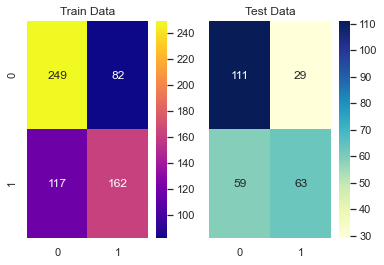

In [1149]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(ytrain,Predict_ytrainM1)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Train Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(ytest,Predict_ytestM1)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
print('\033[1m','Logit :Confusion Matrix','\033[0m')

#### LDA

In [1150]:
print('\033[1m','LDA :Classification Report : Train Data','\033[0m')
print("")
print(classification_report(ytrain,Predict_ytrainM2))
print('\033[1m','LDA :Classification Report : Test Data','\033[0m')
print("")
print(classification_report(ytest,Predict_ytestM2))

 LDA :Classification Report : Train Data 

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       331
           1       0.64      0.57      0.61       279

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610

 LDA :Classification Report : Test Data 

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       140
           1       0.72      0.57      0.64       122

    accuracy                           0.70       262
   macro avg       0.70      0.69      0.69       262
weighted avg       0.70      0.70      0.69       262



 LDA :Confusion Matrix 


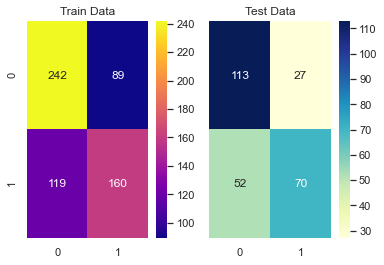

In [1151]:
# Evaluation
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(ytrain,Predict_ytrainM2)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Train Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(ytest,Predict_ytestM2)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
print('\033[1m','LDA :Confusion Matrix','\033[0m')

* Using Stratify = y , increased the True negatives and reduced False positives. But increased the False negatives as well.
* For this business problem, low False negative is preferred.
* Hence, model is preferred without stratify = y

In [1152]:
fpr_LR_t1, tpr_LR_t1, thresholds_LR1 = metrics.roc_curve(ytrain,LR_Model.predict_proba(Xtrain)[:,1])
fpr_LR_t2, tpr_LR_t2, thresholds_LR2 = metrics.roc_curve(ytest,PredictProba_ytestM1[:,1])
fpr_LDA_t1, tpr_LDA_t1, thresholds_LDA1 = metrics.roc_curve(ytrain,LDA_Model.predict_proba(Xtrain)[:,1])
fpr_LDA_t2, tpr_LDA_t2, thresholds_LDA2 = metrics.roc_curve(ytest,PredictProba_ytestM2[:,1])

Area under the curve for Logistic Regression Model is 73.406 %
Area under the curve for LDA Model is 73.466 %


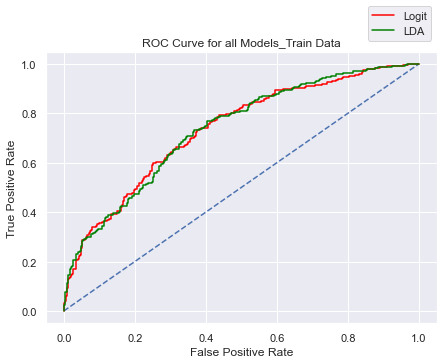

In [1073]:
# Train:

print('Area under the curve for Logistic Regression Model is',
      round((roc_auc_score(ytrain,LR_Model.predict_proba(Xtrain)[:,1])*100),3),'%')
print('Area under the curve for LDA Model is',
      round((roc_auc_score(ytrain,LDA_Model.predict_proba(Xtrain)[:,1])*100),3),'%')


plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_LR_t1, tpr_LR_t1,color='red',label="Logit");
plt.plot(fpr_LDA_t1, tpr_LDA_t1,color='green',label="LDA");

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

Area under the curve for Logistic Regression Model is 72.553 %
Area under the curve for LDA Model is 72.436 %


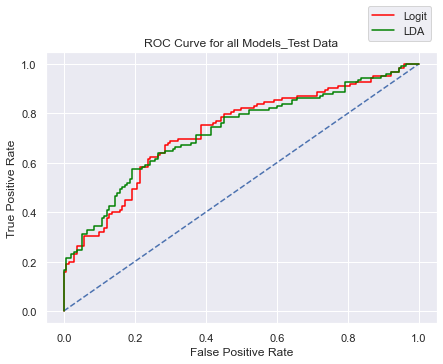

In [1074]:
# Test:

print('Area under the curve for Logistic Regression Model is',
      round((roc_auc_score(ytest,LR_Model.predict_proba(Xtest)[:,1])*100),3),'%')
print('Area under the curve for LDA Model is',
      round((roc_auc_score(ytest,LDA_Model.predict_proba(Xtest)[:,1])*100),3),'%')

plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_LR_t2, tpr_LR_t2,color='red',label="Logit");
plt.plot(fpr_LDA_t2, tpr_LDA_t2,color='green',label="LDA");
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

In [1075]:
# Getting the Parameters for Logit Model - Train Data 

Logit_train_CR=classification_report(ytrain, Predict_ytrainM1,output_dict=True)
df_CR_Train=pd.DataFrame(Logit_train_CR).transpose()


# (claimed)
Logit_train_precision = df_CR_Train.iloc[1][0]
Logit_train_recall = df_CR_Train.iloc[1][1]
Logit_train_f1 = df_CR_Train.iloc[1][2]
Logit_train_acc = df_CR_Train.iloc[2][0]

In [1076]:
# Getting the Parameters for Logit Model - Test Data 

Logit_test_CR=classification_report(ytest, Predict_ytestM1,output_dict=True)
df_CR_Test=pd.DataFrame(Logit_test_CR).transpose()


# (claimed)
Logit_test_precision = df_CR_Test.iloc[1][0]
Logit_test_recall = df_CR_Test.iloc[1][1]
Logit_test_f1 = df_CR_Test.iloc[1][2]
Logit_test_acc = df_CR_Test.iloc[2][0]

In [1077]:
# Getting the Parameters for LDA Model - Train Data 

LDA_train_CR=classification_report(ytrain, Predict_ytrainM2,output_dict=True)
df_LDA_Train=pd.DataFrame(LDA_train_CR).transpose()


# (claimed)
LDA_train_precision = df_LDA_Train.iloc[1][0]
LDA_train_recall = df_LDA_Train.iloc[1][1]
LDA_train_f1 = df_LDA_Train.iloc[1][2]
LDA_train_acc = df_LDA_Train.iloc[2][0]

In [1078]:
# Getting the Parameters for LDA Model - Test Data 

LDA_test_CR=classification_report(ytest, Predict_ytestM2,output_dict=True)
df_LDA_Test=pd.DataFrame(LDA_test_CR).transpose()


# (claimed)
LDA_test_precision = df_LDA_Test.iloc[1][0]
LDA_test_recall = df_LDA_Test.iloc[1][1]
LDA_test_f1 = df_LDA_Test.iloc[1][2]
LDA_test_acc = df_LDA_Test.iloc[2][0]

In [1079]:
AUC_train_Logit = roc_auc_score(ytrain,LR_Model.predict_proba(Xtrain)[:,1])
AUC_train_LDA = roc_auc_score(ytrain,LDA_Model.predict_proba(Xtrain)[:,1])

AUC_test_Logit = roc_auc_score(ytest,LR_Model.predict_proba(Xtest)[:,1])
AUC_test_LDA = roc_auc_score(ytest,LDA_Model.predict_proba(Xtest)[:,1])


#### Metrics Comparison: Logit and LDA:

In [1080]:
# For Class : 1 ==> Claimed

print('The model performance metric scores: Holiday Package : YES class')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Model_data = pd.DataFrame({'Logit_Train':[Logit_train_acc,AUC_train_Logit,Logit_train_recall,Logit_train_precision,Logit_train_f1],
                           'Logit_Test':[Logit_test_acc,AUC_test_Logit,Logit_test_recall,Logit_test_precision,Logit_test_f1],
                           'LDA_Train':[LDA_train_acc,AUC_train_LDA,LDA_train_recall,LDA_train_precision,LDA_train_f1],
                           'LDA_Test':[LDA_test_acc,AUC_test_LDA,LDA_test_recall,LDA_test_precision,LDA_test_f1],},index=index)
round(Model_data*100,2)

The model performance metric scores: Holiday Package : YES class


,Logit_Train,Logit_Test,LDA_Train,LDA_Test
Accuracy,67.38,66.41,65.90,69.85
AUC,73.41,72.55,73.47,72.44
Recall,58.06,51.64,57.35,57.38
Precision,66.39,68.48,64.26,72.16
F1 Score,61.95,58.88,60.61,63.93



#### Test Metrics:

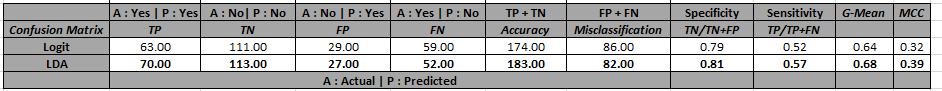

#### Checking the Performance metrics for the model by changing the Probability cutoff  (0.1 to 0.9)

In [1081]:
for j in np.arange(0.3,0.7,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(ytrain)):
        if np.array(LDA_Model.predict_proba(Xtrain)[:,1])[i] > custom_prob:
           
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print('Cutoff:',round(j,3),'\t','Accuracy Score',round(metrics.accuracy_score(ytrain,custom_cutoff_data),4),
                                    'F1 Score',round(metrics.f1_score(ytrain,custom_cutoff_data),4),
                                      'Precision',round(metrics.precision_score(ytrain,custom_cutoff_data),4),
                                        'recall',round(metrics.recall_score(ytrain,custom_cutoff_data),4)
         )

Cutoff: 0.3 	 Accuracy Score 0.5934 F1 Score 0.6737 Precision 0.5322 recall 0.9176
Cutoff: 0.4 	 Accuracy Score 0.6689 F1 Score 0.6824 Precision 0.6078 recall 0.7778
Cutoff: 0.5 	 Accuracy Score 0.659 F1 Score 0.6061 Precision 0.6426 recall 0.5735
Cutoff: 0.6 	 Accuracy Score 0.6443 F1 Score 0.5057 Precision 0.6938 recall 0.3978


#### Model Selection:

1. False Negative: Predicting an Employee who is interested in holiday package as not interested has more impact  on the business. 
2. Recall is the important metric.
3. the count of True positives, False negatives, Recall and F1 score for Linear Discriminant analysis is better than Logistic regression model.
4. If we can change the cut-off probabilities with the approval from the Tour and travel agency, Recall of 91% for 0.3 and 75%  for 0.4 cutoff can be shown.


#### Logit using Stats model to check the pvalues of the features:

In [1082]:
import statsmodels.api as sm
LR_Model_stats = sm.Logit(ytrain,Xtrain[['Salary','Age','No_years_Education','No_Young_kids','Foreigner','No_Elder_kids']])
result = LR_Model_stats.fit()

Optimization terminated successfully.
         Current function value: 0.611718
         Iterations 6


In [1083]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Jun 2021   Pseudo R-squ.:                  0.1128
Time:                        16:11:50   Log-Likelihood:                -373.15
converged:                       True   LL-Null:                       -420.60
Covariance Type:            nonrobust   LLR p-value:                 6.251e-19
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Salary             -1.527e-05   5.03e-06     -3.033      0.002   -2.51e-05    -5.4e-06
Age                   -0.0190      0.006     -3.026      0.002      -0.031      -0.007
No_years_Education     0.1198      0.029      4.093      0.000       0.062       0.177
No_Young_kids         -1.1439      0.196     -5.846      0.000      -1.527      -0.760
Foreigner              1.4127      0.221      6.400      0.000       0.980       1.845
No_Elder_kids          0.1050      0.080      1.311      0.190      -0.052       0.262
======================================================================================
"""

* pvalue for No of Elder kids is > 0.05. Not a good predictor

In [1084]:
# Logit sklearn Coeff:

Logit_coef = pd.DataFrame(LR_Model.coef_,columns=list(Xtrain))
round(Logit_coef,5)

,Salary,Age,No_years_Education,No_Young_kids,No_Elder_kids,Foreigner
0,-0.00002,-0.03461,0.07128,-1.33848,0.0369,1.02155


In [1085]:
# LDA sklearn Coeff:

LDA_coef = pd.DataFrame(LDA_Model.coef_,columns=list(Xtrain))
round(LDA_coef,5)

,Salary,Age,No_years_Education,No_Young_kids,No_Elder_kids,Foreigner
0,-0.00001,-0.05566,0.03149,-1.437,-0.0342,1.14735


In [1086]:
# Intercept

# If the intercept has a positive sign: then the probability of having the outcome will be > 0.5 

# i.e., employee will prefer the holiday package

LDA_Model.intercept_

array([2.60697363])

#### Coefficients Interpretation:
1. The Number of Elder kids had pvalue > 0.05. This feature is not a good predictor.
2. The coefficients for Number of young kids and Foreigner are high.
3. The correlation heatmap expressed a negative relationship between Number of young kids and Target. The correlation heatmap expressed a positive relationship between Foreigner and Target. The coefficients from stat model and sklearn model confirms the same.
4. When employees have zero  Number of young kids they opt for the package.
5. Foreign employees opt for package. 

#### Discriminant scores from LDA:

In [1087]:
vdf_Test = pd.DataFrame({'Discriminant_Score':LDA_Model.transform(Xtest).ravel(),'Holiday_package':ytest.values})

In [1088]:
vdf_Test['Prediction'] = Predict_ytestM2

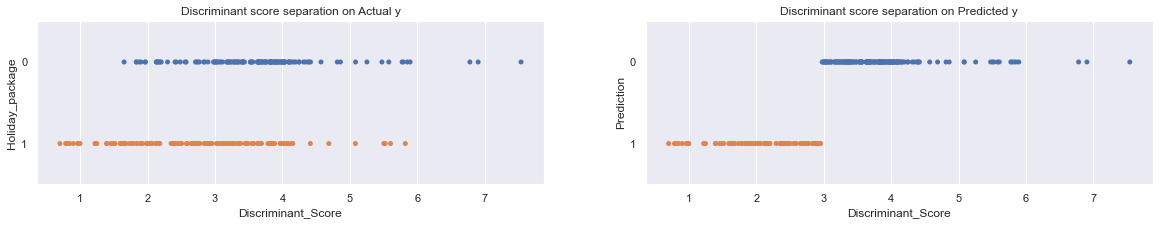

In [1170]:
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
plt.title('Discriminant score separation on Actual y')
sns.stripplot(x=vdf_Test['Discriminant_Score'],y=vdf_Test['Holiday_package'],jitter=False,orient='h')
plt.subplot(1,2,2)
plt.title('Discriminant score separation on Predicted y')
sns.stripplot(x=vdf_Test['Discriminant_Score'],y=vdf_Test['Prediction'],jitter=False,orient='h')
plt.show()

#### The Predictions and Predicted probabilities are concatenated to the Test data set and analysed.

In [1093]:
DF_Predictions  = pd.concat([Xtest,ytest],axis=1)
DF_Predictions['Predicted_Probabilities'] = PredictProba_ytestM2[:,1]
DF_Predictions['Predicted_Holiday_Package'] = Predict_ytestM2

In [1098]:
DF_Predictions.iloc[50:55,:]

,Salary,Age,No_years_Education,No_Young_kids,No_Elder_kids,Foreigner,Holiday_package,Predicted_Probabilities,Predicted_Holiday_Package
287,44476.0,36,12,0,2,0,1,0.565939,1
313,50066.0,55,9,0,0,0,1,0.289119,0
740,32175.0,58,5,0,0,1,1,0.553591,1
147,142183.0,31,15,0,2,0,0,0.313394,0
491,36308.0,25,16,2,0,0,0,0.156674,0


In [1099]:
# A dataframe with columns = Probability of getting 1, Original target class , Predicted target class, Discriminant score 
# On test data
Negative = DF_Predictions[DF_Predictions['Holiday_package'] == 0]
Positive = DF_Predictions[DF_Predictions['Holiday_package'] == 1]

False_Positive = Negative[Negative['Predicted_Holiday_Package'] ==1]
True_Negative = Negative[Negative['Predicted_Holiday_Package'] ==0]
True_Positive = Positive[Positive['Predicted_Holiday_Package'] ==1]
False_Negative = Positive[Positive['Predicted_Holiday_Package'] ==0]

True Positive observations: Histplot


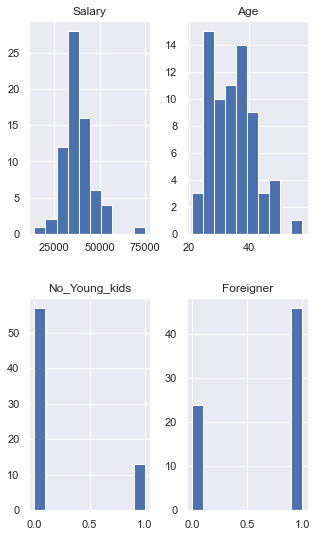

In [1100]:
True_Positive.hist(['Salary','Age','No_Young_kids','Foreigner'],figsize=(5,9))
print('True Positive observations: Histplot')

plt.show()

True Negative observations: Histplot


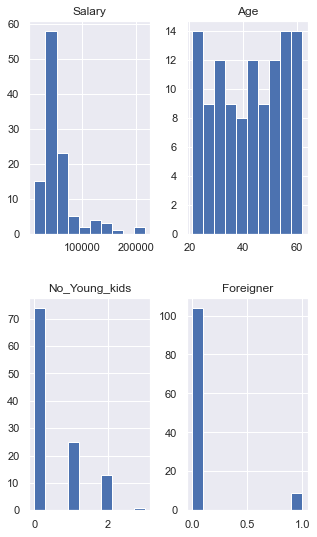

In [1101]:
True_Negative.hist(['Salary','Age','No_Young_kids','Foreigner'],figsize=(5,9))
print('True Negative observations: Histplot')
plt.show()

False Positive observations: Histplot


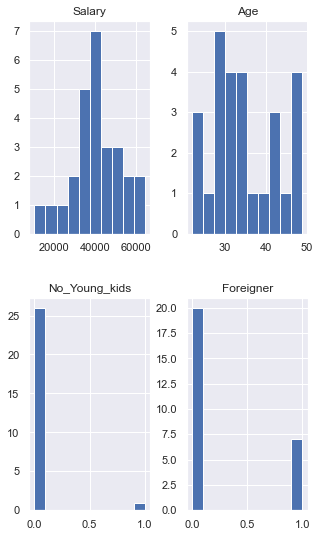

In [1102]:
False_Positive.hist(['Salary','Age','No_Young_kids','Foreigner'],figsize=(5,9))
print('False Positive observations: Histplot')
plt.show()

False Negative observations: Histplot


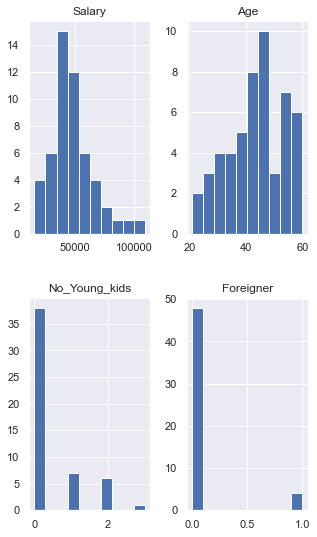

In [1103]:
False_Negative.hist(['Salary','Age','No_Young_kids','Foreigner'],figsize=(5,9))
print('False Negative observations: Histplot')
plt.show()

### END